In [117]:
# importing libaries 
import numpy as np 
import pandas as pd 

# data visualization
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [118]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [119]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [121]:
df.shape

(4177, 9)

In [122]:
#Sex M, F, and I (infant)---------------------->:SEX
#LengthLongest shell measurement-------------------->:LENGTH
#Diameterperpendicular to length-------------------->:Diameter
#Heightwith meat in shell---------------------------->:Height
#Whole weightwhole abalone---------------------------->:whole weight
#Shucked weightweight of meat------------------>shucked weight
#Viscera weightgut weight (after bleeding)-------->Viscera weight
#Shell weightafter being dried------------------->shell weight
#Rings+1.5 gives the age in years--------------->rings
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


as we see there is no missing data in dataset,and the one ring is equal to Rings + 1.5 years and here so maximum age is 29+1.5=30.5 and mimimum age is 2.5 
there are might some outliers in Whole weight,Shucked weight,Shell weight

In [123]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


we have to convert sex variable into numeric and feacher have differnt range so we try to keep it at same scale 

In [124]:
df.columns 

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# DATA PREPROCESSING

In [125]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

so as we see that the sex has 3 categories, but these are in object we need to cnvert into numeric

In [126]:
df['Sex']=df['Sex'].replace({'M':0,'F':1,'I':2})
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


now there is no object value is there , all are numeric values 

<AxesSubplot:ylabel='Sex'>

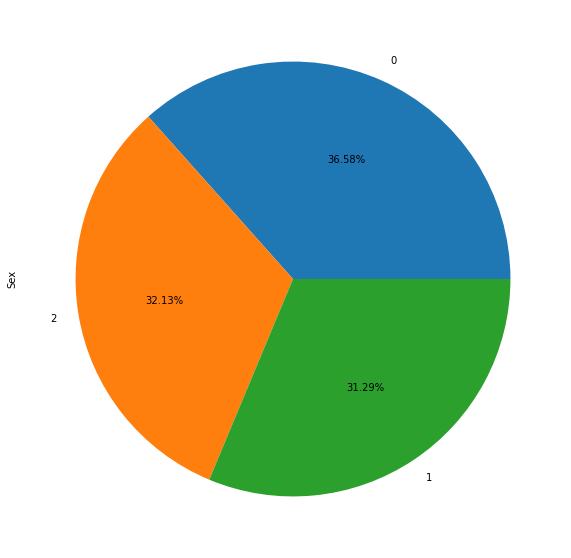

In [128]:
plt.figure(figsize=(10,10))
df['Sex'].value_counts().plot.pie(autopct="%2.2f%%")

<AxesSubplot:xlabel='Sex', ylabel='Length'>

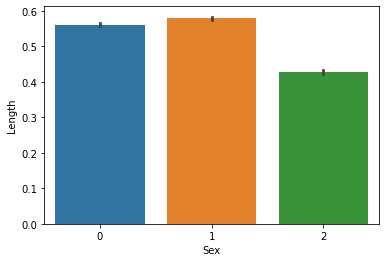

In [129]:
sb.barplot(x='Sex',y='Length',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Diameter'>

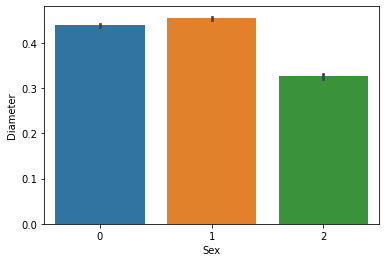

In [130]:
sb.barplot(x='Sex',y='Diameter',data=df)


<AxesSubplot:xlabel='Sex', ylabel='Height'>

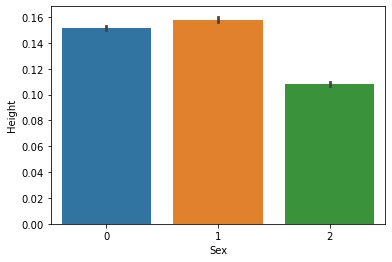

In [131]:
sb.barplot(x='Sex',y='Height',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Whole weight'>

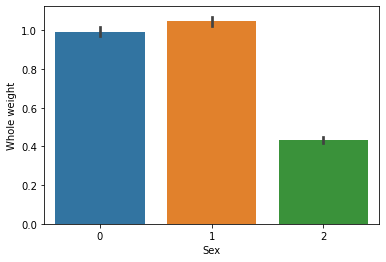

In [132]:
sb.barplot(x='Sex',y='Whole weight',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Shucked weight'>

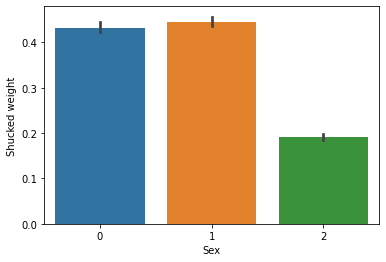

In [133]:
sb.barplot(x='Sex',y='Shucked weight',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Viscera weight'>

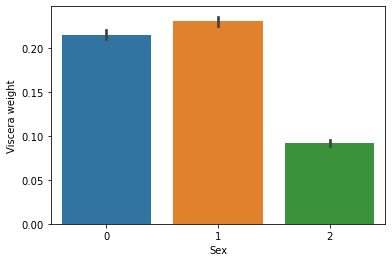

In [134]:
sb.barplot(x='Sex',y='Viscera weight',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

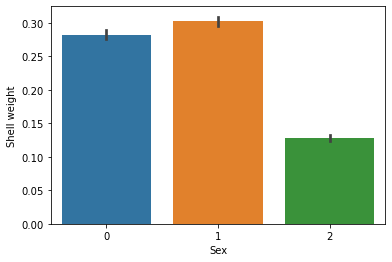

In [135]:
sb.barplot(x='Sex',y='Shell weight',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

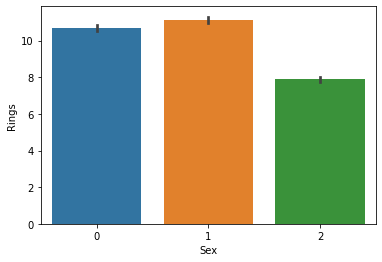

In [136]:
sb.barplot(x='Sex',y='Rings',data=df)

In [137]:
## now checking the correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

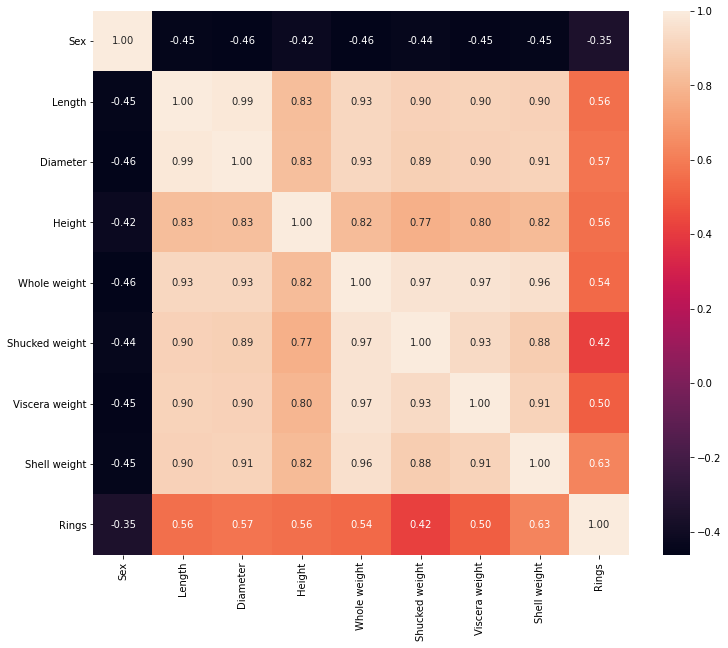

In [138]:
# for better interpretation using heat map:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),annot=True,fmt='.2f')

here the all the columns showing the positive correlation, so its better to drop the columns

In [139]:
# droping the sex columns 
df.drop('Sex',axis=1,inplace=True)

In [140]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


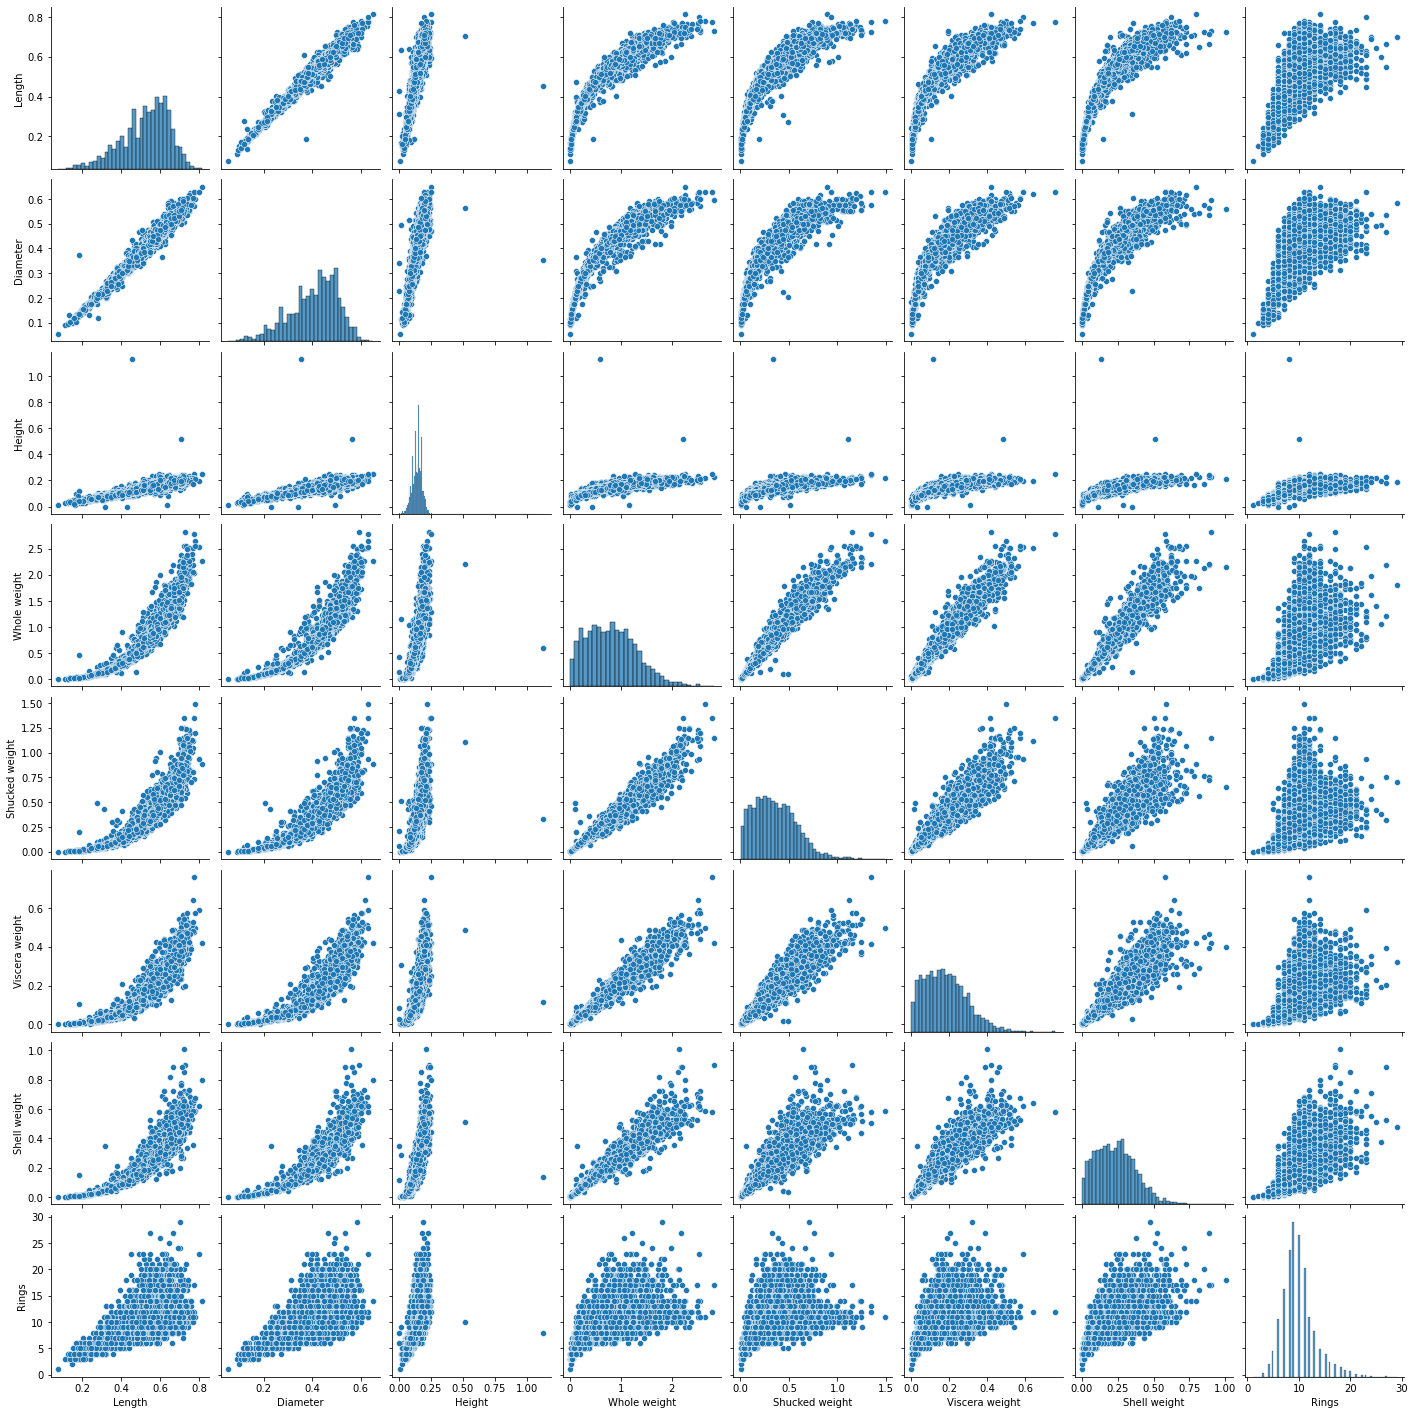

In [141]:
sb.pairplot(df)

# checking the outliers  

we only cheack the outliers from continous columns as it in here all the columns have the continous data 

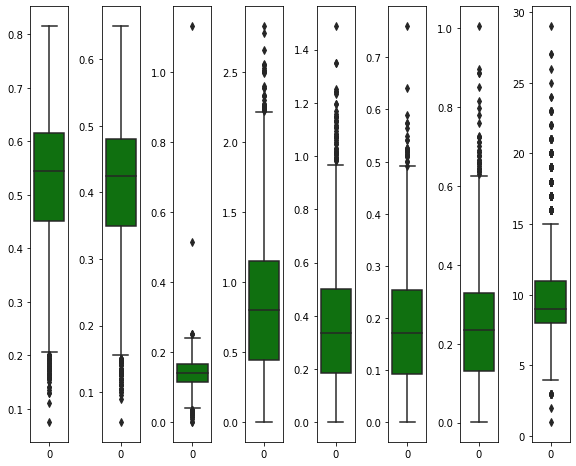

In [142]:
import warnings
warnings.filterwarnings('ignore')

collist= df.columns.values
nrows=14
ncol=30
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Here we deal with the outliers but befor doing that by using the z-score but before that we analysized more

# here we see the distribution plot to see how it is distributed 

In [143]:
df.columns 

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:xlabel='Length', ylabel='Density'>

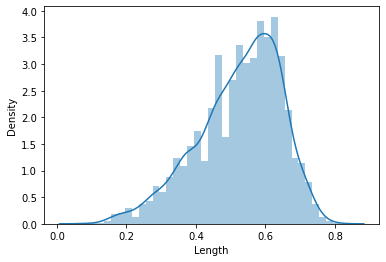

In [144]:
sb.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

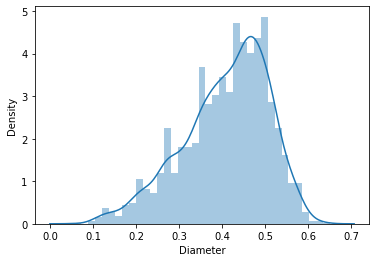

In [145]:
sb.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

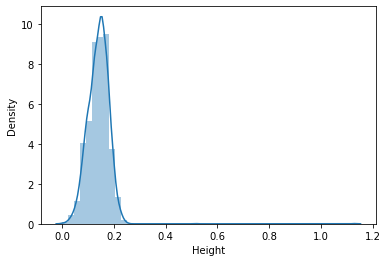

In [146]:
sb.distplot(df['Height'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

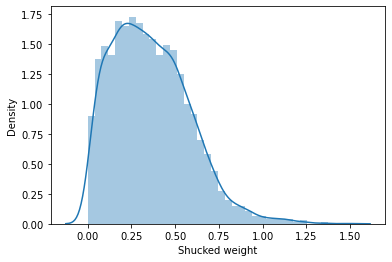

In [147]:
sb.distplot(df['Shucked weight'])


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

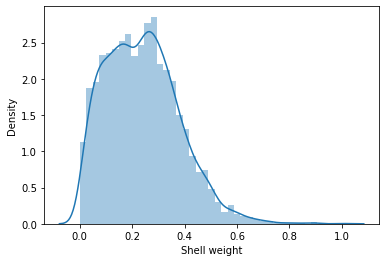

In [148]:
sb.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

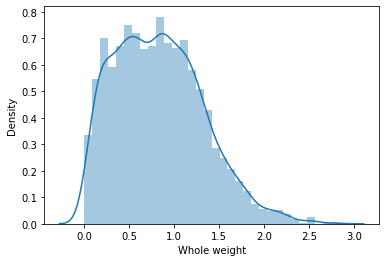

In [149]:
sb.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

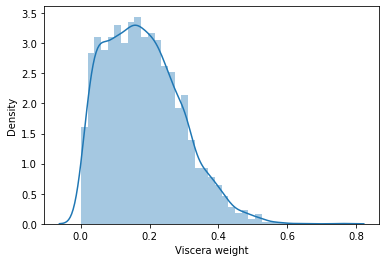

In [150]:
sb.distplot(df['Viscera weight'])

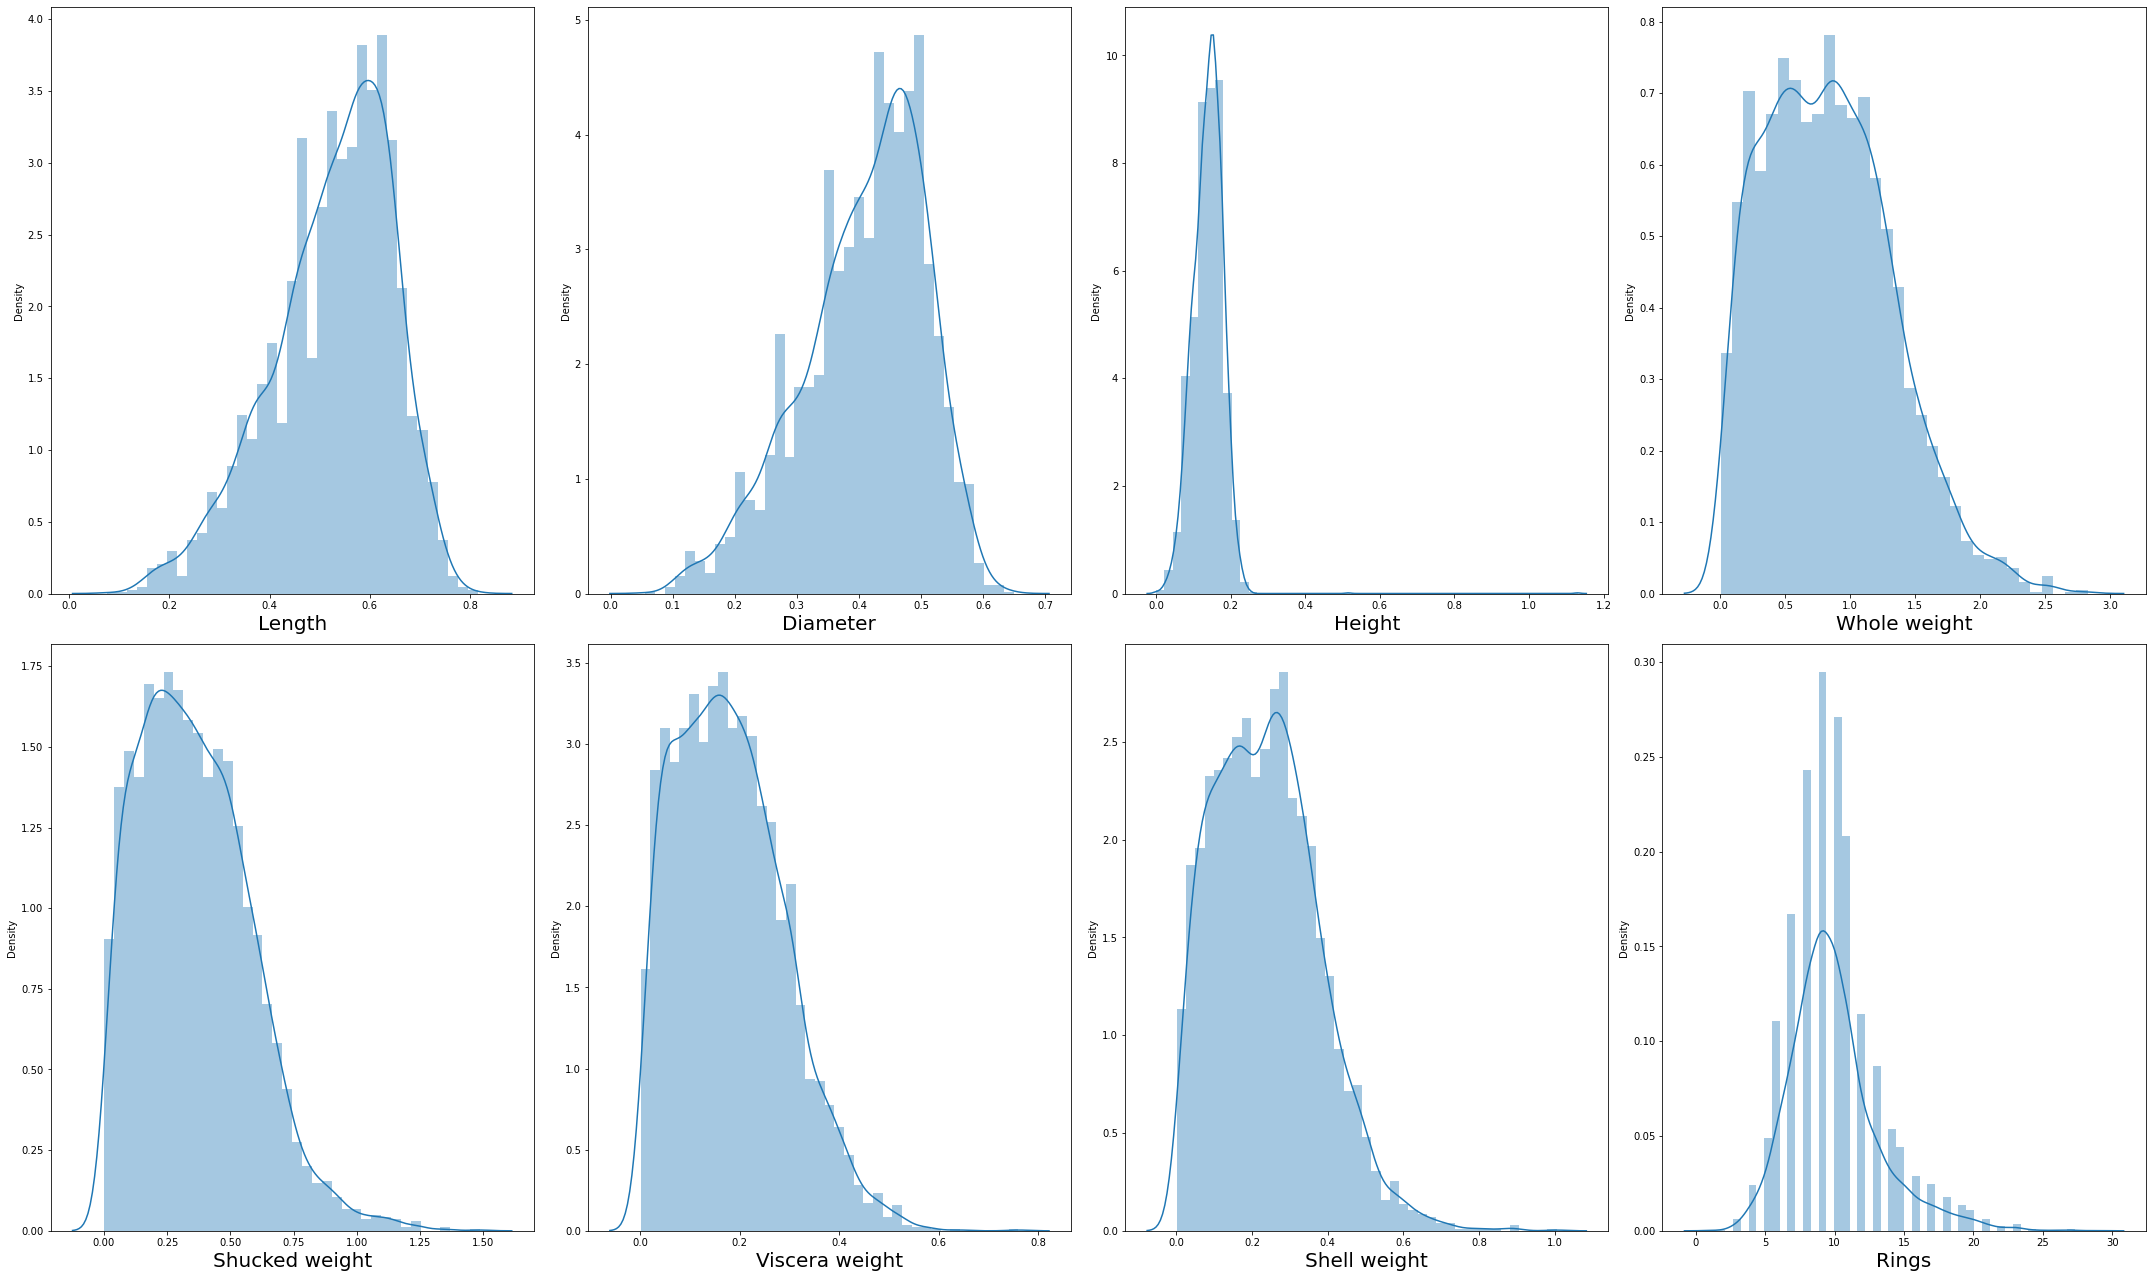

In [181]:
plt.figure(figsize=(30,35))
numb=1

for columns in df:
    if numb<=14:
        ax= plt.subplot(4,4,numb)
        sb.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()

as we see all the feature is skewed, so we have to free from skweness but not on target variable as it do not disturbeed the original output

# removing outliers

by using z score

In [151]:
from scipy.stats import zscore

In [152]:
z=np.abs(zscore(df))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [153]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [154]:
# how may outliers are there
len(np.where(z>3)[0])

200

In [155]:
df_new=df[(z<3).all(axis=1)]
print('shape of old data frame:--',df.shape)
print('shape of new data frame:--',df_new.shape)


shape of old data frame:-- (4177, 8)
shape of new data frame:-- (4027, 8)


In [156]:
df_new.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Transforming the data free from skewness

In [157]:
from sklearn.preprocessing import power_transform

In [158]:
x=df_new.drop('Rings',axis=1)
y=df_new['Rings']

In [180]:
x.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [159]:
y.unique()

array([15,  7,  9, 10,  8, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 17,  3],
      dtype=int64)

so what we did here is first we had to seprate the label and features, than we apply the method for skewness

In [178]:
# here we use the the yeo- johnson method beacuse it work on both -ve as well as +ve data 

df1=power_transform(x)

pd.DataFrame(df1,columns=x.columns).skew().sort_values(ascending=False)
df1=pd.DataFrame(df1)
df1.columns=x.columns
df1.head()
# skewness is 0.035 to -0.08

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926


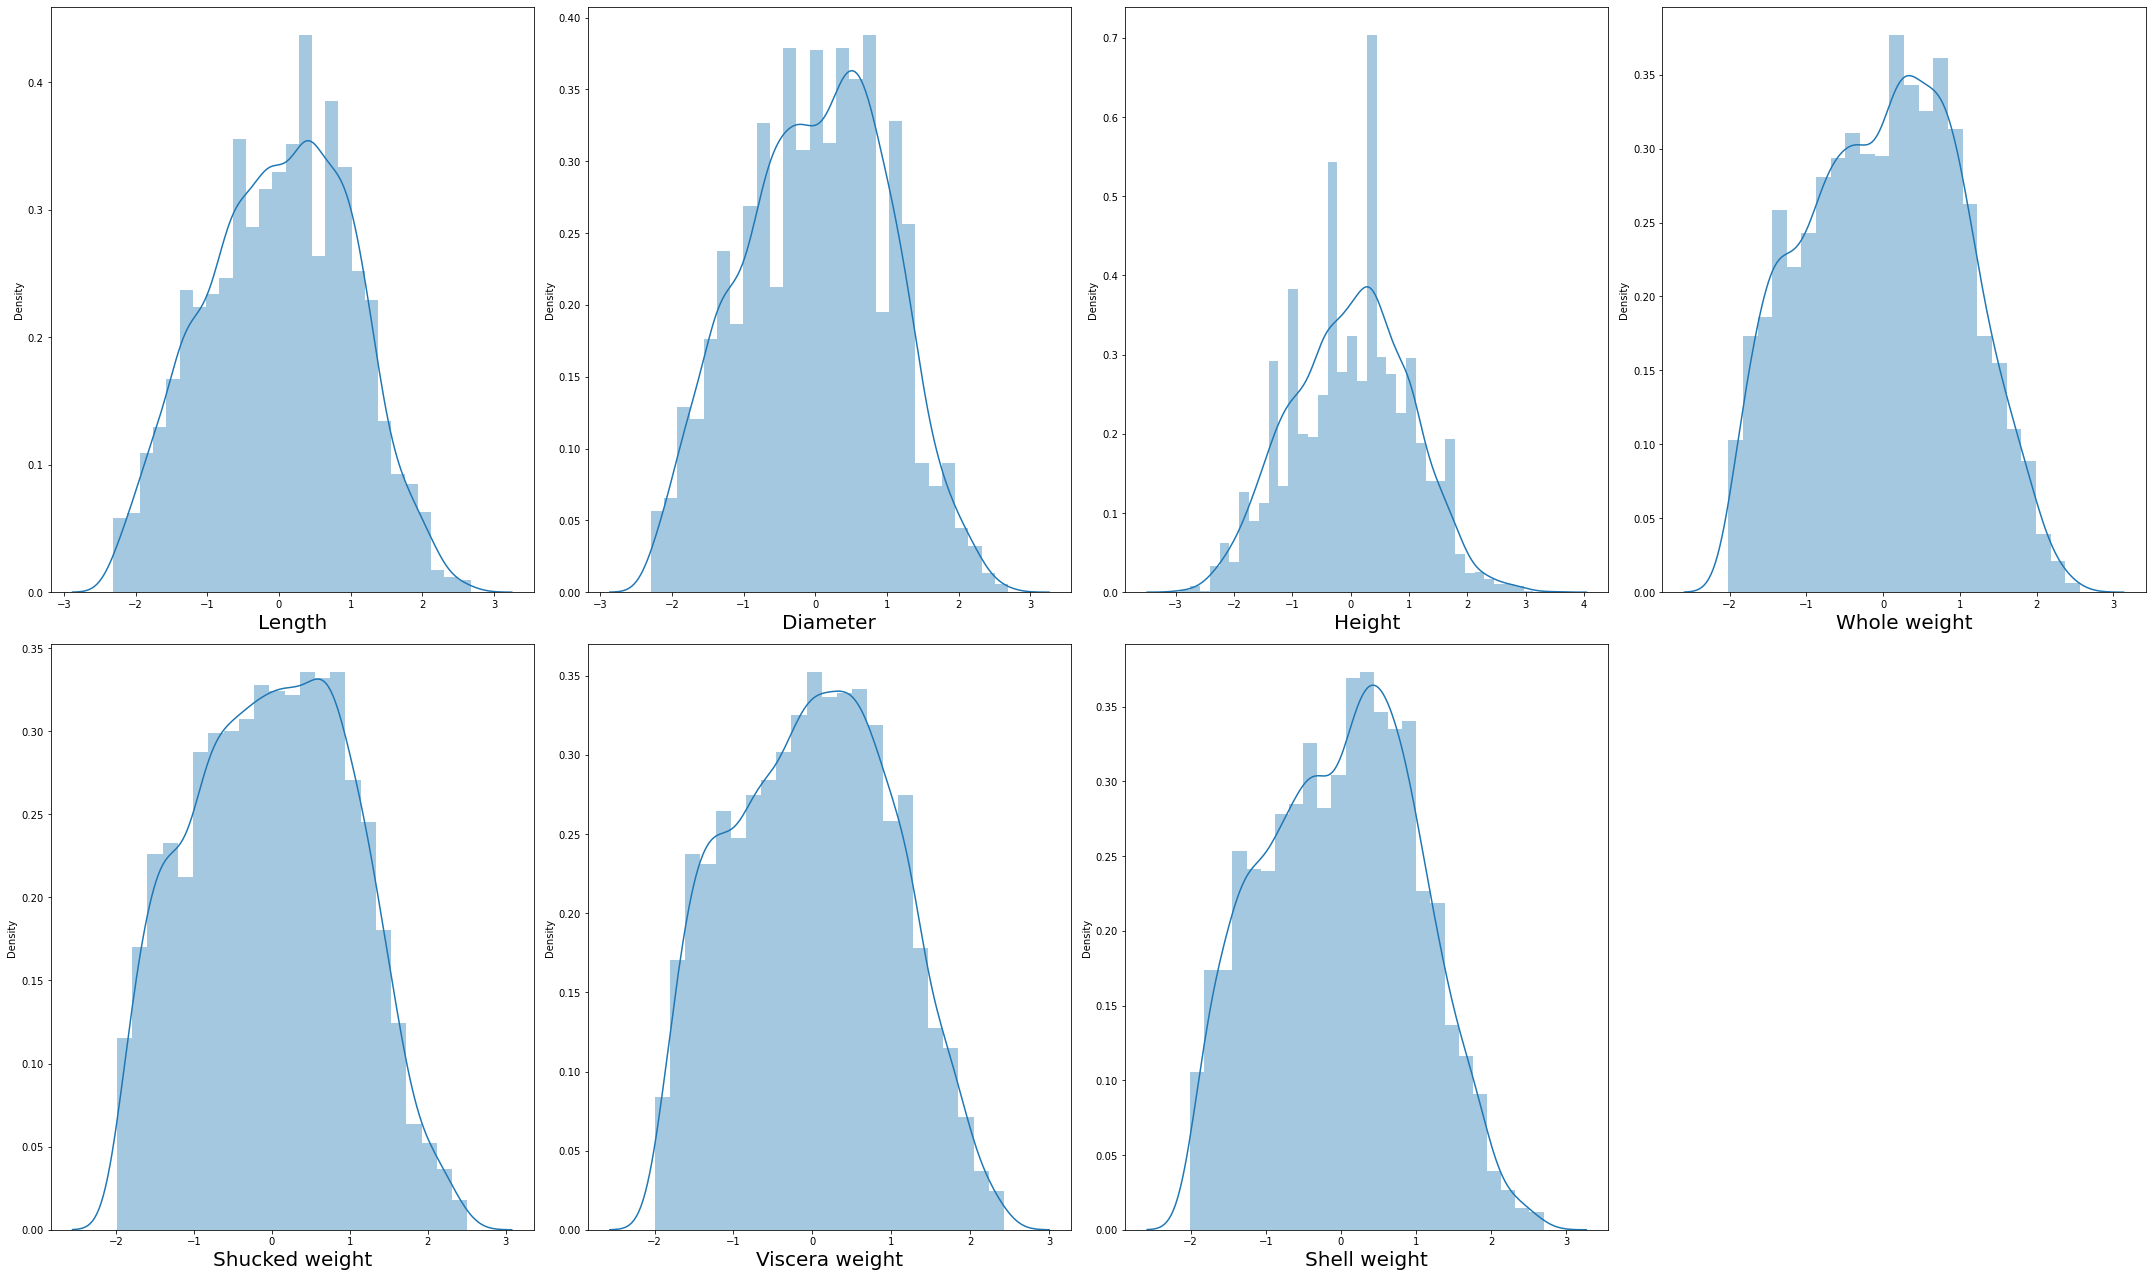

In [179]:
plt.figure(figsize=(30,35))
numb=1

for columns in df1:
    if numb<=14:
        ax= plt.subplot(4,4,numb)
        sb.distplot(df1[columns])
        plt.xlabel(columns,fontsize=20)
        
    numb+=1
plt.tight_layout()

as we compared here we find out that now distribution is all most free from data

# Now we normalized the data as all the data has different measure units

In [182]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [184]:
x_scaled

array([[-0.56936804, -0.42027443, -1.16620737, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [-1.47535808, -1.4631268 , -1.30180583, ..., -1.20941043,
        -1.23110406, -1.25603283],
       [ 0.07776771,  0.15329438, -0.08141969, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 0.68176107,  0.72686319,  1.81695876, ...,  0.85473721,
         1.08172072,  0.60445329],
       [ 0.89747298,  0.83114842,  0.32537569, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.63089349,  1.56114509,  1.54576184, ...,  2.88981235,
         1.94298183,  2.06626381]])

# Building the models

# 1 Linear Regression

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [186]:
lr=LinearRegression()


In [187]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.25)
    lr.fit(x_train,y_train)
    predict_train=lr.predict(x_train)
    predict_test=lr.predict(x_test)
    if round(r2_score(y_train,predict_train)*100,1)==round(r2_score(y_test,predict_test)*100,1):
        print('at random state:-',i)
        print('training score:-',round(r2_score(y_train,predict_train)*100,1))
        print('testing score:-',round(r2_score(y_test,predict_test)*100,1),'\n')

at random state:- 212
training score:- 51.3
testing score:- 51.3 

at random state:- 279
training score:- 51.3
testing score:- 51.3 

at random state:- 361
training score:- 51.3
testing score:- 51.3 

at random state:- 364
training score:- 51.3
testing score:- 51.3 

at random state:- 380
training score:- 51.3
testing score:- 51.3 

at random state:- 495
training score:- 51.3
testing score:- 51.3 

at random state:- 526
training score:- 51.3
testing score:- 51.3 

at random state:- 613
training score:- 51.3
testing score:- 51.3 

at random state:- 619
training score:- 51.3
testing score:- 51.3 

at random state:- 661
training score:- 51.3
testing score:- 51.3 

at random state:- 714
training score:- 51.3
testing score:- 51.3 

at random state:- 734
training score:- 51.3
testing score:- 51.3 

at random state:- 846
training score:- 51.3
testing score:- 51.3 

at random state:- 918
training score:- 51.3
testing score:- 51.3 

at random state:- 939
training score:- 51.3
testing score:- 51

In [188]:
 x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=924,test_size=0.25)

In [189]:
lr.fit(x_train,y_train)

LinearRegression()

In [190]:
lr_predict_train=lr.predict(x_train)
lr_predict_test=lr.predict(x_test)

In [191]:
print(r2_score(y_train,lr_predict_train))
print(r2_score(y_test,lr_predict_test))

0.5125049014658665
0.5137298793289908


almost the same r2score

cross validation for linear regression 

In [192]:
from sklearn.model_selection import cross_val_score,KFold


In [193]:
cv_score=cross_val_score(lr,x,y,cv=3).mean()
print(cv_score)
print(r2_score(y_test,lr_predict_test))

0.49565653312425045
0.5137298793289908


# 2 KNN

In [194]:
from sklearn.neighbors import KNeighborsRegressor

In [195]:
knn=KNeighborsRegressor()

In [196]:
 x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=101,test_size=0.25)

In [197]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [198]:
# prediction
y_predict=knn.predict(x_test)


In [199]:
r2_score(y_test,y_predict)

0.5124521055266189

# 3 Random forest

In [200]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [201]:
rfr_predict=rfr.predict(x_test)

In [202]:
r2_score(y_test,rfr_predict)

0.5319586403202958

# 4 Gradiant boost 

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()

In [204]:
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [205]:
gd_predict=gd.predict(x_test)


In [206]:
r2_score(y_test,gd_predict)

0.5502177478146988

# 5.XGradientboost

In [220]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [221]:
xg_predict=xg.predict(x_test)

In [223]:
r2_score(y_test,xg_predict)

0.5008099148706973

# 6.Support vector machine

In [227]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)


SVR()

In [247]:
svr_predict=svr.predict(x_test)
r2_score(y_test,svr_predict)


0.5212511663770201